# 2. Breast Cancer Classification  



**Using Random Forest Feature Selection** - Designed a model combining Random Forest feature selection and
sequential neural networks to classify breast cancer types with improved accuracy.  

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

Loading the Breast Cancer Dataset

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

# Print features and labels
print("Features:")
print(X)
print("\nLabels:")
print(y)

Features:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0

Splitting the Dataset into Training and Testing Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing the Features

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print scaled features
print("\nScaled Features (X_train):")
print(X_train_scaled)
print("\nScaled Features (X_test):")
print(X_test_scaled)


Scaled Features (X_train):
[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]

Scaled Features (X_test):
[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.79

Building the Neural Network Model

In [5]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(20, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Print model summary
print("\nModel Summary:")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,571 (6.14 KB)

 Trainable params: 1,571 (6.14 KB)

 Non-trainable params: 0 (0.00 B)

Compiling and Training the Model

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=15, validation_split=0.1, verbose=1)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.5228 - loss: 0.7963 - val_accuracy: 0.8261 - val_loss: 0.5437
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7275 - loss: 0.5940 - val_accuracy: 0.9348 - val_loss: 0.4021
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8766 - loss: 0.4295 - val_accuracy: 0.9130 - val_loss: 0.3034
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9166 - loss: 0.3399 - val_accuracy: 0.9348 - val_loss: 0.2386
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9453 - loss: 0.2661 - val_accuracy: 0.9348 - val_loss: 0.1952
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9259 - loss: 0.2395 - val_accuracy: 0.9348 - val_loss: 0.1676
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9555 - loss: 0.1936 - val_accuracy: 0.9348 - val_loss: 0.1480
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9250 - loss: 0.1904 - val_accuracy: 0.9348 - 

Plotting Training History (Accuracy and Loss)

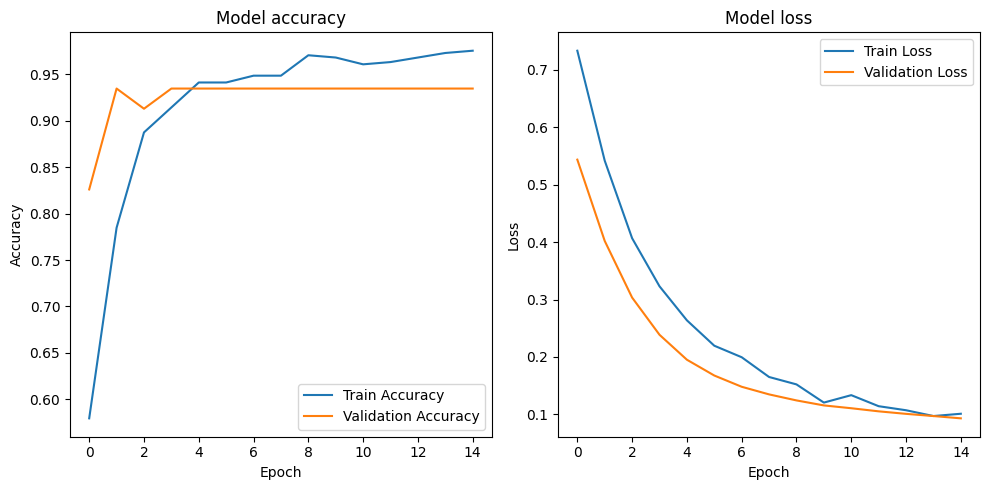

In [7]:
plt.figure(figsize=(10, 5))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Evaluating the Model on Test Data

In [8]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9651 - loss: 0.1057 

Test Accuracy: 96.49%


Making Predictions and Plotting Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


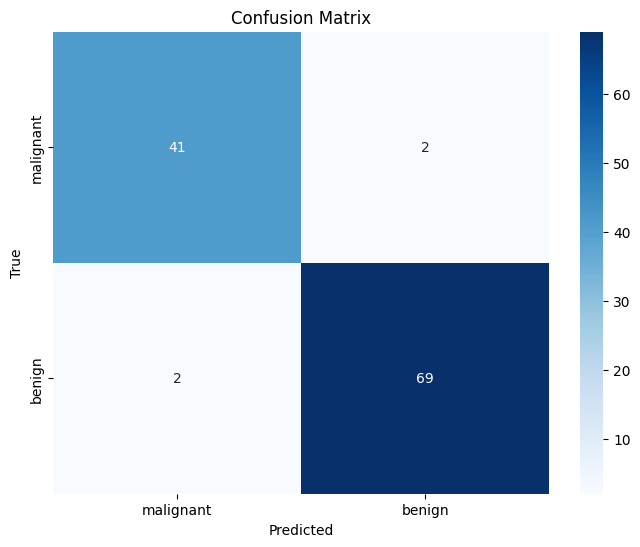

In [9]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Feature Selection Using Random Forest

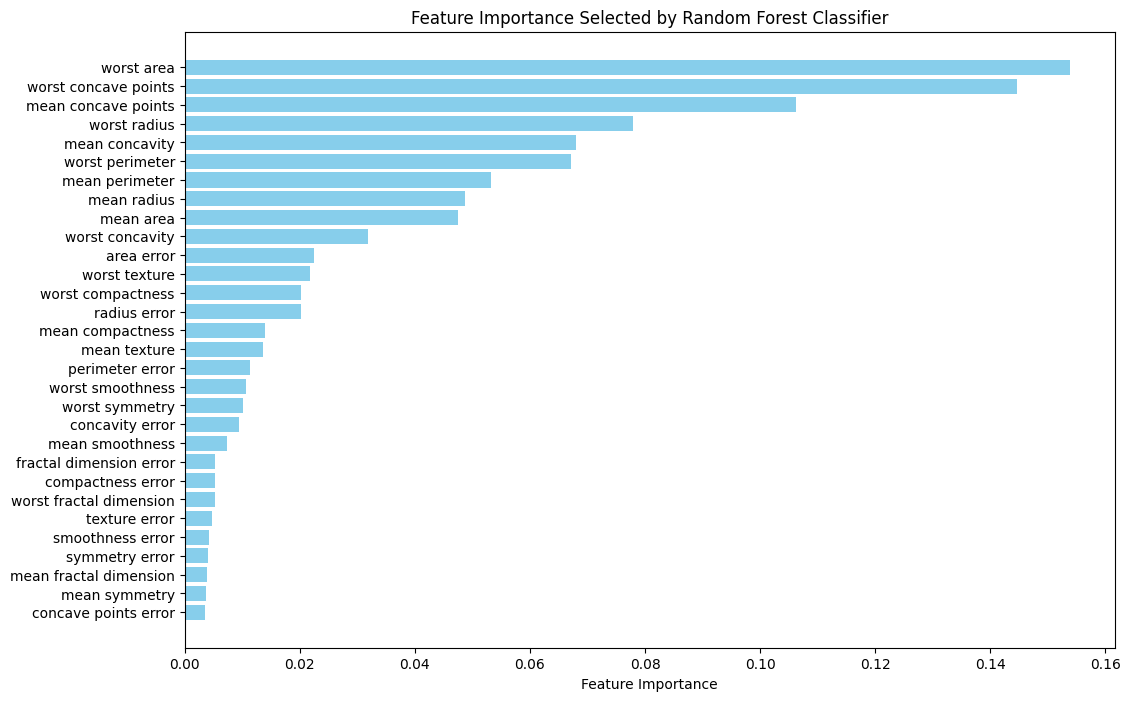

In [10]:
feature_selector_model = RandomForestClassifier(random_state=42)
feature_selector_model.fit(X_train_scaled, y_train)

sorted_indices = np.argsort(feature_selector_model.feature_importances_)

plt.figure(figsize=(12, 8))
plt.barh(data.feature_names[sorted_indices], feature_selector_model.feature_importances_[sorted_indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Selected by Random Forest Classifier')
plt.show()

User Input Prediction Based on Selected Features

In [11]:
selector = SelectFromModel(feature_selector_model, max_features=5)
X_train_selected = selector.transform(X_train_scaled)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = data.feature_names[selected_feature_indices]

user_input = {}
for feature_name in selected_feature_names:
    while True:
        try:
            value = float(input(f"Enter value for {feature_name}: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numerical value.")
    user_input[feature_name] = value

user_input_df = pd.DataFrame(user_input, index=[0])
user_scaler = StandardScaler()
user_input_scaled = user_scaler.fit_transform(user_input_df)
user_input_scaled_reshaped = np.zeros((user_input_scaled.shape[0], X_train_scaled.shape[1]))
user_input_scaled_reshaped[:, selected_feature_indices] = user_input_scaled

prediction = model.predict(user_input_scaled_reshaped)[0][0]
if prediction >= 0.5:
    print("Predicted class: Malignant")
else:
    print("Predicted class: Benign")

Enter value for mean concavity: 0.3001
Enter value for mean concave points: 0.1471
Enter value for worst radius: 25.38
Enter value for worst area: 2019
Enter value for worst concave points: 0.2654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Malignant


**Using Logistic Regression** - Developed a logistic regression model for breast cancer classification, focusing on data
preprocessing and achieving 97.37% accuracy.

Data Preprocessing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Breast Cancer Wisconsin dataset
df = pd.read_csv('/content/breast-cancer.csv')

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Preprocessing: Map 'M' (Malignant) to 1 and 'B' (Benign) to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    fl

Logistic Regression Model

In [13]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the classification report
report = classification_report(y_test, y_pred)

# Discussion
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Logistic Regression Accuracy: 0.9737

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Data Visualizations

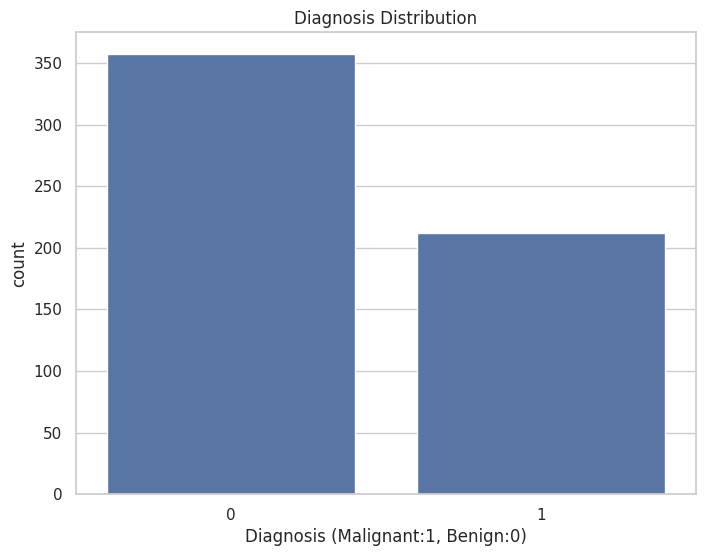

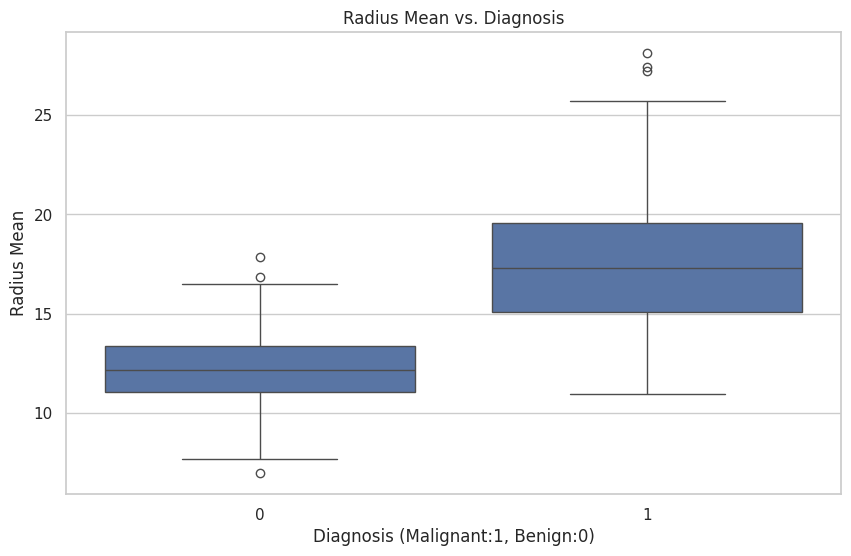

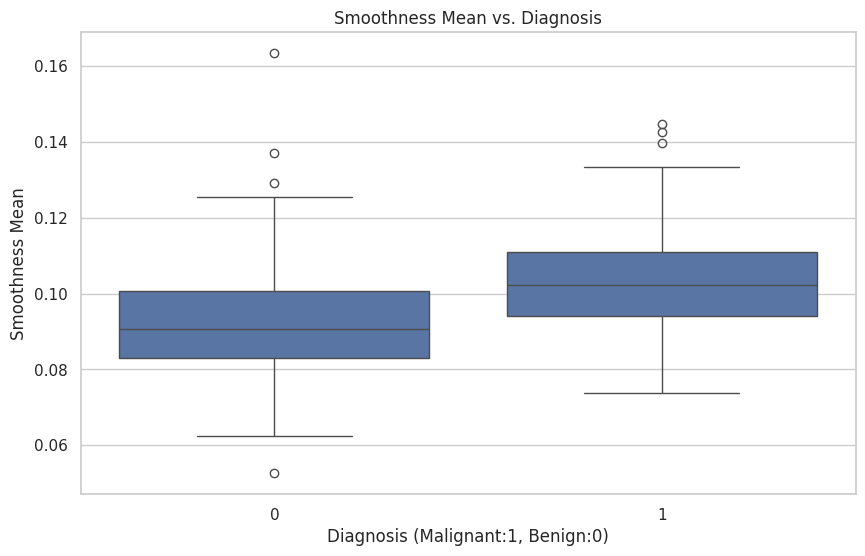

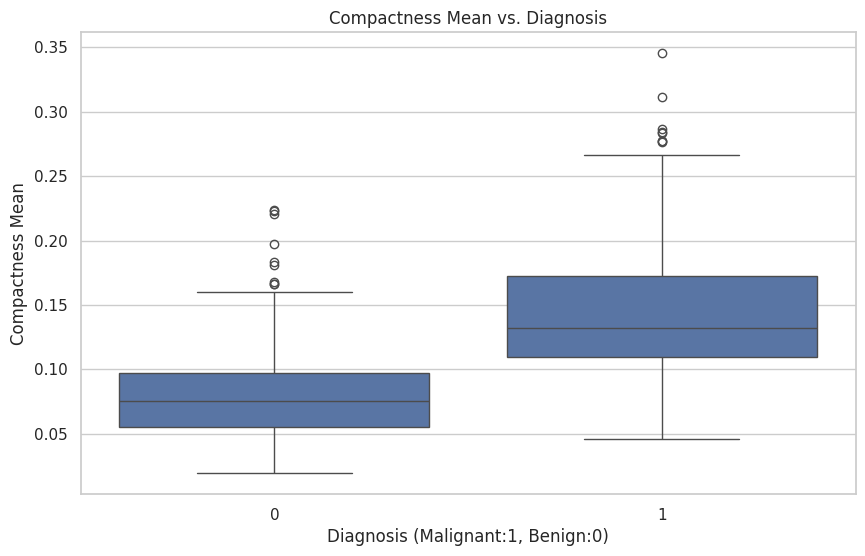

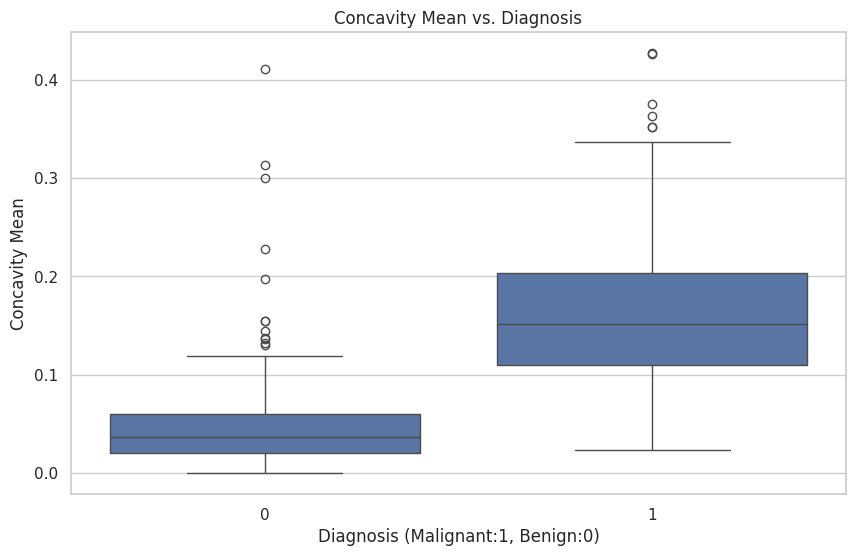

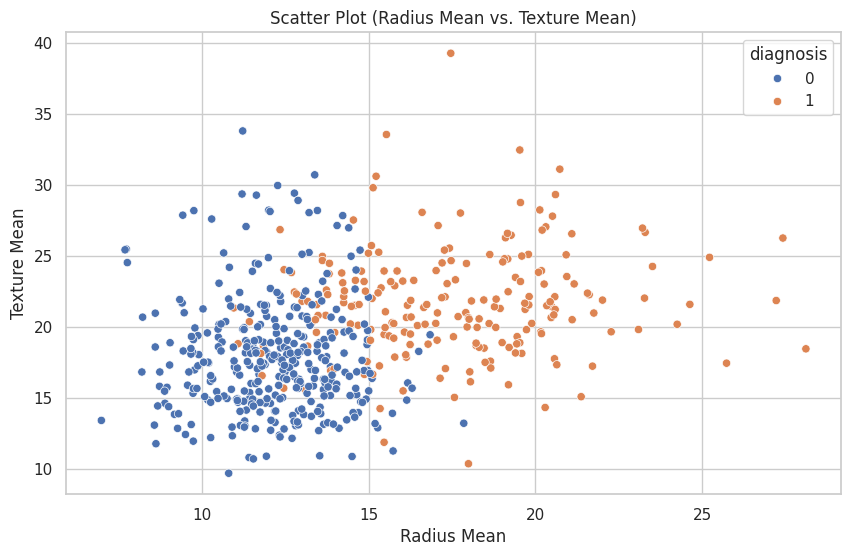

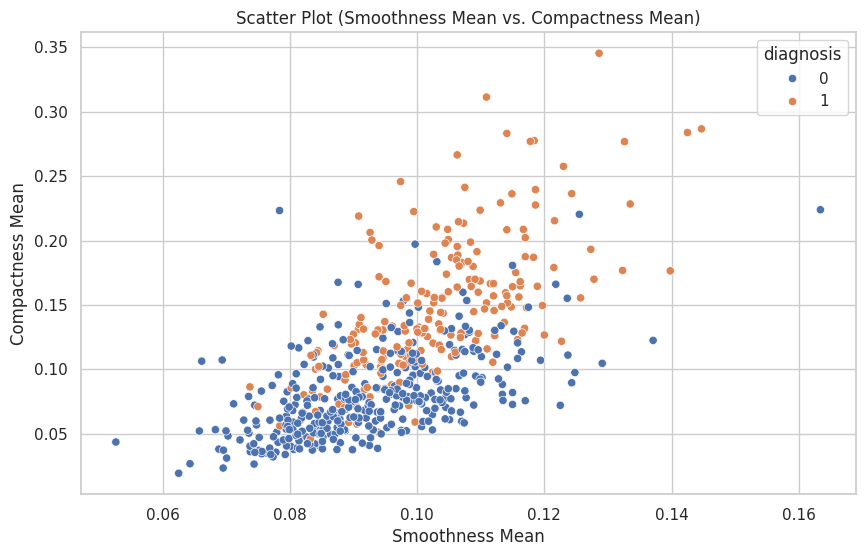

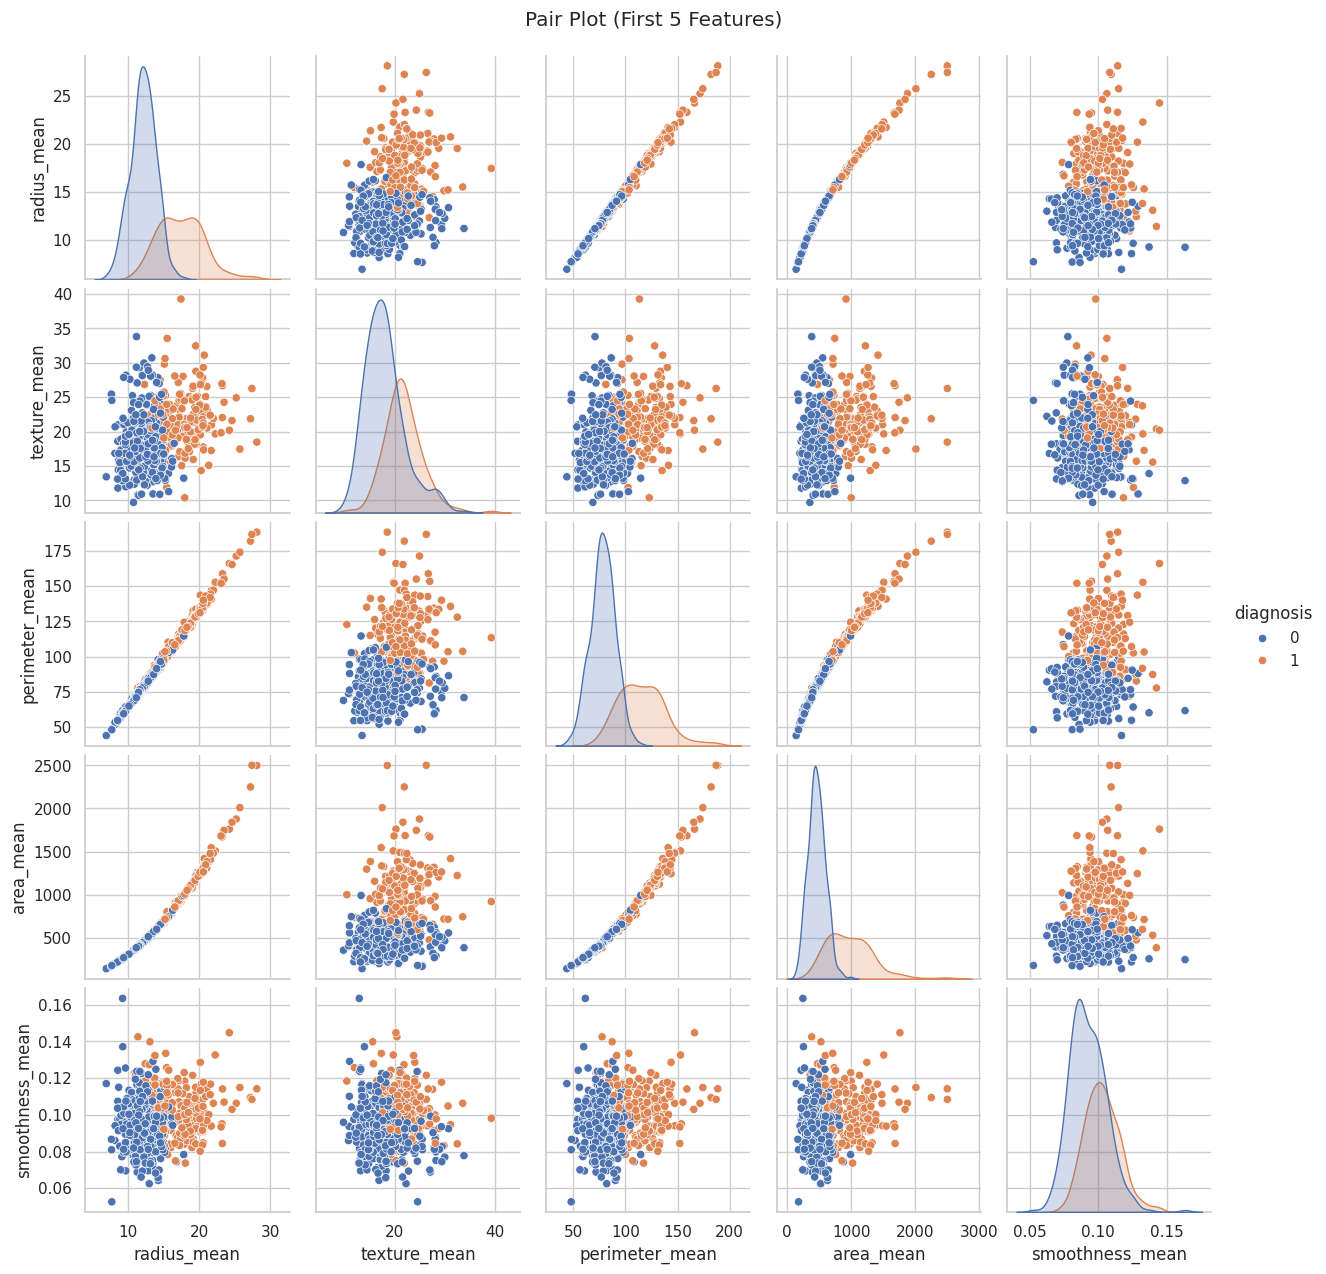

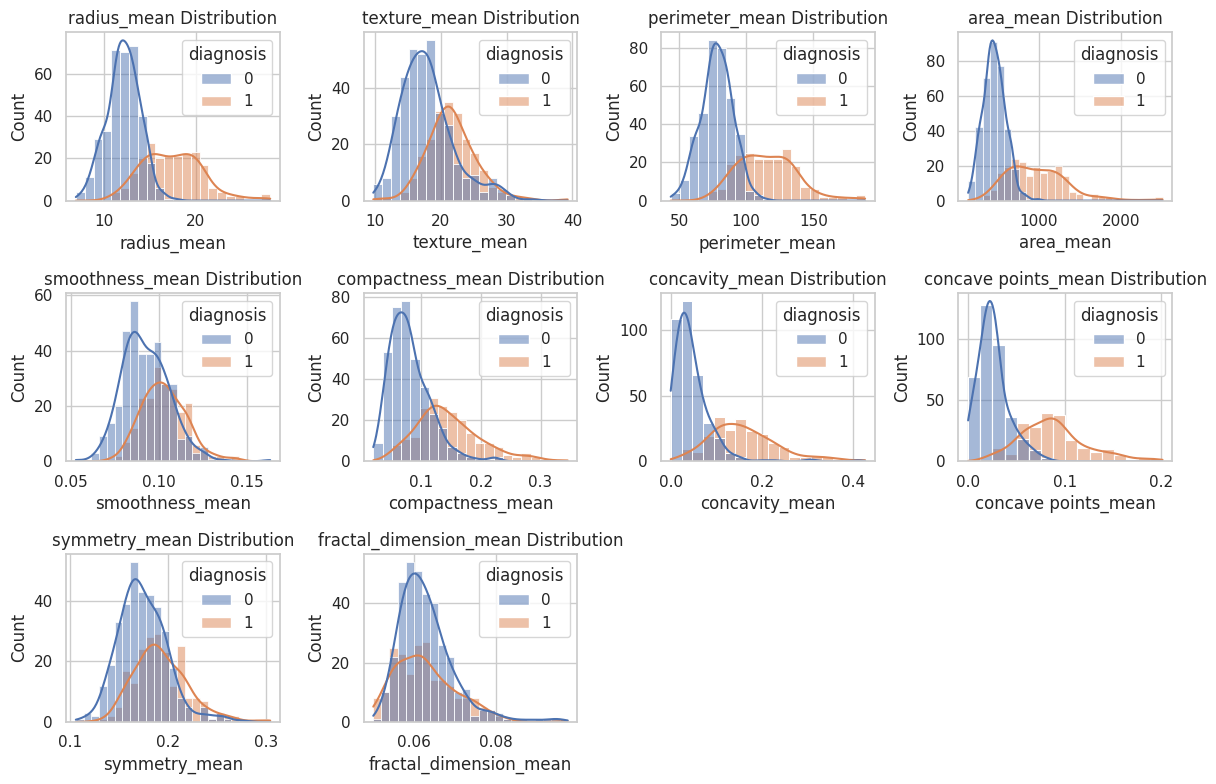

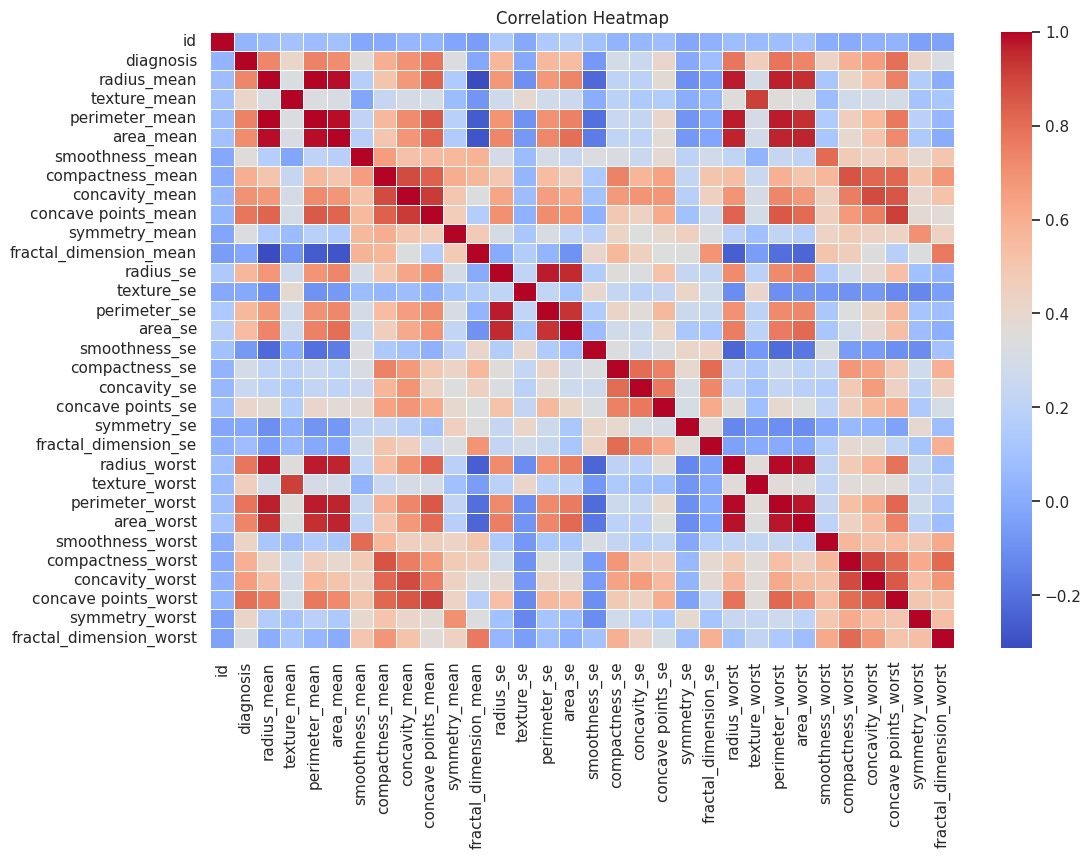

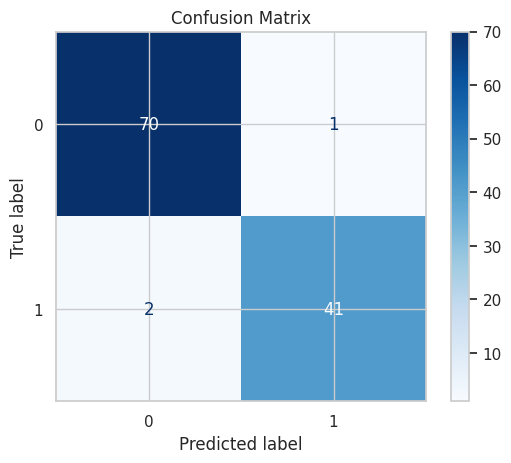

In [15]:
sns.set(style="whitegrid")

# Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis')
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis (Malignant:1, Benign:0)")
plt.show()

# Box Plot 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Radius Mean vs. Diagnosis")
plt.xlabel("Diagnosis (Malignant:1, Benign:0)")
plt.ylabel("Radius Mean")
plt.show()

# Box Plot 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df)
plt.title("Smoothness Mean vs. Diagnosis")
plt.xlabel("Diagnosis (Malignant:1, Benign:0)")
plt.ylabel("Smoothness Mean")
plt.show()

# Box Plot 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='compactness_mean', data=df)
plt.title("Compactness Mean vs. Diagnosis")
plt.xlabel("Diagnosis (Malignant:1, Benign:0)")
plt.ylabel("Compactness Mean")
plt.show()

# Box Plot 4
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='concavity_mean', data=df)
plt.title("Concavity Mean vs. Diagnosis")
plt.xlabel("Diagnosis (Malignant:1, Benign:0)")
plt.ylabel("Concavity Mean")
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title("Scatter Plot (Radius Mean vs. Texture Mean)")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='smoothness_mean', y='compactness_mean', hue='diagnosis')
plt.title("Scatter Plot (Smoothness Mean vs. Compactness Mean)")
plt.xlabel("Smoothness Mean")
plt.ylabel("Compactness Mean")
plt.show()
# Pair Plot
sns.pairplot(df, hue='diagnosis', vars=X.columns[:5])
plt.suptitle("Pair Plot (First 5 Features)", y=1.02)
plt.show()

# Histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns[:10], start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=feature, kde=True, hue='diagnosis')
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=.5, annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()